In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import magic_input_processing as magic

In [2]:
df = magic.empty_input_df(1850, 2020)

met_df = pd.read_excel('example_data_Birkenes.xls', sheet_name='Ark1', index_col='Date', parse_dates=True)

met_df

,P,T
Date,,
1970-12-31,0.000000,-9.421179
1971-01-01,0.000000,-10.657111
1971-01-02,0.000000,-9.518103
1971-01-03,0.062504,-2.644568
1971-01-04,0.151470,0.754633
...,...,...
2019-06-25,9.851470,14.191309
2019-06-26,0.000000,17.754633
2019-06-27,0.000000,16.635248


In [3]:
emep_df = magic.get_emep_deposition_scales()

emep_df

,half-SO4,SO4,NH4,NO3
Date,,,,
1850-01-01,0.50,0.05,0.00,0.00
1915-01-01,0.81,0.61,NaN,NaN
1925-01-01,0.82,0.64,NaN,NaN
1940-01-01,0.89,0.78,NaN,NaN
1955-01-01,1.10,1.20,NaN,NaN
1960-01-01,1.13,1.26,0.99,0.53
1965-01-01,1.24,1.48,1.00,0.63
1970-01-01,1.30,1.60,1.02,0.74
1975-01-01,1.20,1.41,1.12,0.76


In [4]:
dep_df = pd.read_excel('example_dep_Birkenes.xls', sheet_name='Ark1', index_col='year', parse_dates=True)

dep_df

,SO4,NO3,NH4,Ca,Mg,Na,Cl,K,pH
year,,,,,,,,,
1973-01-01,1.06,NaN,NaN,NaN,0.11,NaN,NaN,NaN,4.27
1974-01-01,1.11,0.50,0.52,0.23,0.19,NaN,NaN,NaN,4.25
1975-01-01,1.01,0.49,0.45,0.19,0.17,NaN,NaN,NaN,4.27
1976-01-01,1.18,0.63,0.50,0.17,0.12,NaN,NaN,NaN,4.21
1977-01-01,1.04,0.54,0.54,0.17,0.17,1.3741,2.5139,NaN,4.27
1978-01-01,1.17,0.62,0.57,0.17,0.12,0.9523,1.7058,NaN,4.11
1979-01-01,1.25,0.57,0.65,0.22,0.15,1.2625,2.3349,NaN,4.09
1980-01-01,1.23,0.57,0.63,0.22,0.11,0.8457,1.5760,0.1600,4.16
1981-01-01,1.04,0.52,0.53,0.20,0.13,0.9864,1.8236,0.1422,4.21


In [5]:

 # 'P'  is the name of the precip. time series in the source document
magic.add_precip_ts(df, met_df, 'P', patch_ref_range=range(1971, 1981))
# 'T'  is the name of the air t. time series in the source document
magic.add_air_temperature_ts(df, met_df, 'T', patch_ref_range=range(1971, 1981))
magic.add_deposition_ts(df, dep_df, 'SO4', patch_scale=emep_df['SO4'], patch_ref_range=range(1989,1992))
magic.add_deposition_ts(df, dep_df, 'NH4', patch_scale=emep_df['NH4'], patch_ref_range=range(1989,1992))
magic.add_deposition_ts(df, dep_df, 'NO3', patch_scale=emep_df['NO3'], patch_ref_range=range(1989,1992))
magic.add_deposition_ts(df, dep_df, 'Mg',  patch_ref_range=range(1974, 1977))

df

,Precipitation,Air temperature,SO4 conc in precip,NH4 conc in precip,NO3 conc in precip,Mg conc in precip
1850-01-01,150.281601,-2.130791,0.039333,0.000000,0.000000,0.16
1850-02-01,94.927760,-2.352198,0.039898,0.000398,0.000241,0.16
1850-03-01,97.186647,-0.044312,0.040463,0.000795,0.000482,0.16
1850-04-01,68.092517,4.052830,0.041028,0.001193,0.000723,0.16
1850-05-01,75.874579,9.448422,0.041592,0.001590,0.000964,0.16
...,...,...,...,...,...,...
2020-08-01,132.137412,15.649026,0.200000,0.290000,0.310000,0.14
2020-09-01,161.089467,11.666296,0.200000,0.290000,0.310000,0.14
2020-10-01,190.433495,7.408007,0.200000,0.290000,0.310000,0.14
2020-11-01,174.186231,3.425137,0.200000,0.290000,0.310000,0.14


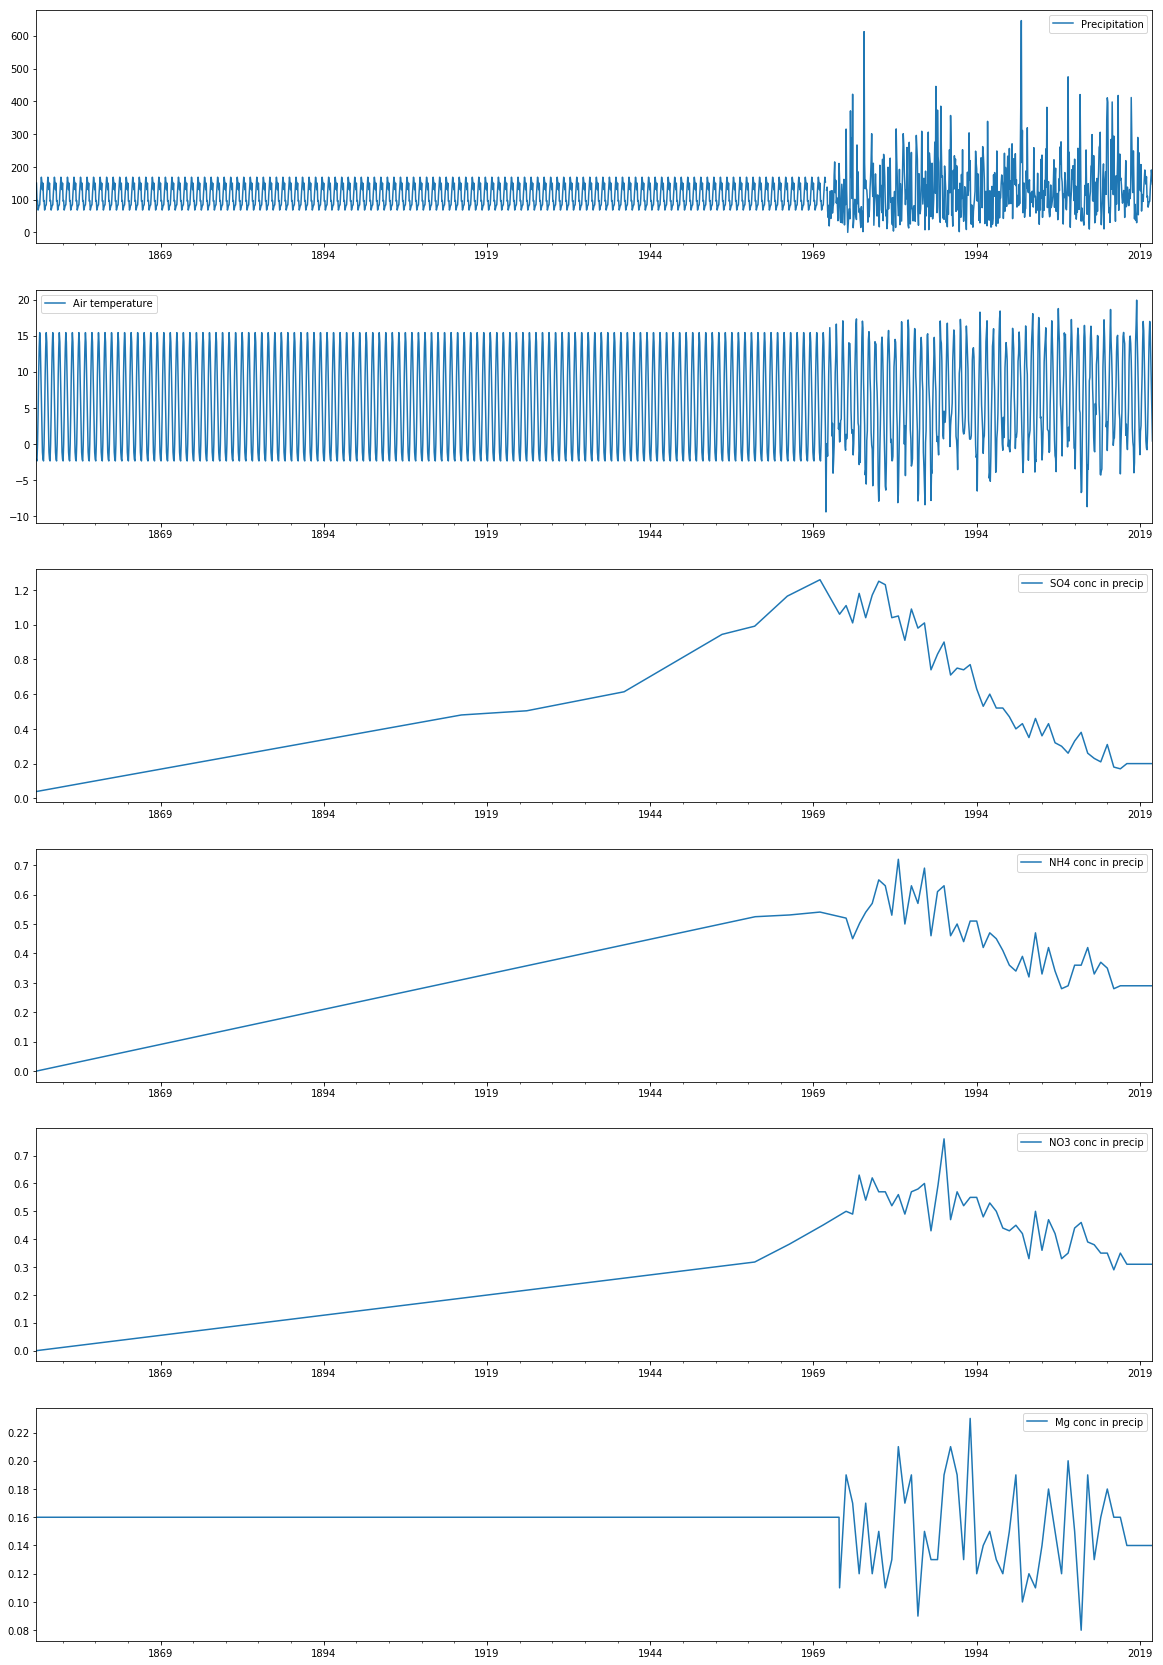

In [6]:
magic.plot_inputs(df)

In [7]:
magic.write_as_input_file(df, 'test_inputs.dat')